In [2]:
%matplotlib inline
!pip install tsfresh
!pip install tensorflow
!pip install numpy==1.21
import os
!pip install torch

import pandas as pd
import numpy as np
from typing import Tuple

import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, MaxPooling2D,Conv2D,Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K
print("Basic imports: Done!")


    
print("Done")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Basic imports: Done!
Done


In [3]:
pdiot_data_dir = "./2022/"

import os 
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/PDIoT")
cwd= os.getcwd()
print (cwd)
ls= os.listdir()
print (ls)
#os.chdir("/")



student_ids = dict()

activity_list = ["Sitting",
                 "Sitting bent forward",
                 "Sitting bent backward",
                 "Standing",
                 "Lying down left",
                 "Lying down right",
                 "Lying down on stomach",
                 "Lying down on back",
                 "Walking at normal speed",
                 "Running",
                 "Climbing stairs",
                 "Descending stairs",
                 "Desk work",
                 "Movement"]

thingy_cols_list = ['timestamp', 'accel_x', 'accel_y', 'accel_z', 
                    'gyro_x', 'gyro_y', 'gyro_z', 
                    'mag_x', 'mag_y', 'mag_z', 
                    'sensor_type', 'activity_type', 'activity_code', 
                    'subject_id', 'notes', 'recording_id']

respeck_cols_list = ['timestamp', 'accel_x', 'accel_y', 'accel_z', 
                     'gyro_x', 'gyro_y', 'gyro_z', 
                     'sensor_type', 'activity_type', 'activity_code', 
                     'subject_id', 'notes', 'recording_id']

expected_freq = 25

expected_length_seconds = 30

all_student_ids = [s for s in os.listdir(pdiot_data_dir) if s[0]=='s' ]
#all_student_ids



Mounted at /content/drive
/content/drive/MyDrive/PDIoT
['cnn_rnn_gru.ipynb', 'FINAL CNN.ipynb', 'clean_train', 'FMR100.tflite', 'FMT100.tflite', 'Model for Thingy.tflite', 'Model for Both.ipynb', 'Final-model-test', 'app.zip', '2022', '4 Classes Model for Respeck.ipynb', 'Model for Thingy.ipynb', 'Final_Model_for_Thingy.ipynb', 'FINAL_CNN_DianTu_RRRR.ipynb', 'application.apk', 'FM1000.tflite', 'Report.gdoc', 'Model for Respeck.ipynb', 'R2301.tflite', 'Group_H_PDIoT_CW3_Report.gdoc', 'Copy of Model for Respeck.ipynb', 'Copy of Model for Thingy.ipynb']


In [7]:
from os import listdir
from os.path import isfile, join
import random
# import all data
# base_df = pd.DataFrame()
base_df = pd.read_csv("./2022/Thingy_recordings_clean.csv")



# for i in random.choices(all_student_ids, k=20):
#     clean_data_folder = pdiot_data_dir+i
#     for filename in os.listdir(clean_data_folder):
#         full_path = f"{clean_data_folder}/{filename}"
#         #print(full_path)
#         # load data into a DataFrame
#         new_df = pd.read_csv(full_path)
        
    
#         # merge into the base DataFrame
#         base_df = pd.concat([base_df, new_df])
print("Done")

Done


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
base_df

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,0,1632912509851,0.020508,0.293945,-0.967773,-0.21875,0.21875,0.09375,0.0,0.0,0.0,Thingy,Lying down on stomach,8,s1870467,Rob,Thingy_s1870467_Lying down on stomach_29-09-20...
1,1,1632912509886,0.027344,0.287109,-0.971680,-0.21875,0.15625,-0.03125,0.0,0.0,0.0,Thingy,Lying down on stomach,8,s1870467,Rob,Thingy_s1870467_Lying down on stomach_29-09-20...
2,2,1632912509910,0.023438,0.295898,-0.980469,-0.21875,0.15625,0.03125,0.0,0.0,0.0,Thingy,Lying down on stomach,8,s1870467,Rob,Thingy_s1870467_Lying down on stomach_29-09-20...
3,3,1632912509972,0.011719,0.287109,-0.981445,-0.03125,0.09375,0.09375,0.0,0.0,0.0,Thingy,Lying down on stomach,8,s1870467,Rob,Thingy_s1870467_Lying down on stomach_29-09-20...
4,4,1632912510002,0.020508,0.295898,-0.976562,0.15625,0.03125,0.09375,0.0,0.0,0.0,Thingy,Lying down on stomach,8,s1870467,Rob,Thingy_s1870467_Lying down on stomach_29-09-20...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476996,488470,1633561049240,-0.121094,-0.396484,-0.922852,-0.12500,0.00000,0.12500,0.0,0.0,0.0,Thingy,Lying down right,6,s2211228,NaN,Thingy_s2211228_Lying down right_06-10-2021_23...
476997,488471,1633561049285,-0.126953,-0.395508,-0.931641,-0.06250,0.00000,-0.12500,0.0,0.0,0.0,Thingy,Lying down right,6,s2211228,NaN,Thingy_s2211228_Lying down right_06-10-2021_23...
476998,488472,1633561049329,-0.112305,-0.399414,-0.924805,0.25000,0.12500,-0.12500,0.0,0.0,0.0,Thingy,Lying down right,6,s2211228,NaN,Thingy_s2211228_Lying down right_06-10-2021_23...
476999,488473,1633561049351,-0.124023,-0.399414,-0.924805,0.12500,0.25000,0.00000,0.0,0.0,0.0,Thingy,Lying down right,6,s2211228,NaN,Thingy_s2211228_Lying down right_06-10-2021_23...


In [9]:
#Clean data
#base_df=base_df.dropna(thresh=5).drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
#Clean data
base_df=base_df[base_df["sensor_type"]=="Thingy"]
base_df=base_df.dropna(subset=['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z'])
base_df=base_df[base_df["activity_type"]!="Falling on the back"]
base_df=base_df[base_df["activity_type"]!="Falling on the left"]
base_df=base_df[base_df["activity_type"]!="Falling on the right"]
base_df=base_df[base_df["activity_type"]!="Falling on knees"]
base_df=base_df[base_df["activity_type"]!="Falling on knees"]
base_df = base_df[(base_df["activity_type"]=="Sitting")|(base_df["activity_type"]=="Standing")|(base_df["activity_type"]=="Desk work")]

In [10]:
base_df

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
1535,1535,1632912584761,-0.260742,-0.439453,0.867188,-0.18750,-0.87500,0.81250,0.0000,0.0000,0.000,Thingy,Desk work,31,s1870467,Rob,Thingy_s1870467_Desk work_29-09-2021_11-50-15
1536,1536,1632912584792,-0.262695,-0.443359,0.861328,-0.34375,-0.18750,-0.03125,0.0000,0.0000,0.000,Thingy,Desk work,31,s1870467,Rob,Thingy_s1870467_Desk work_29-09-2021_11-50-15
1537,1537,1632912584822,-0.264648,-0.442383,0.863281,0.93750,0.65625,-1.00000,0.0000,0.0000,0.000,Thingy,Desk work,31,s1870467,Rob,Thingy_s1870467_Desk work_29-09-2021_11-50-15
1538,1538,1632912584883,-0.270508,-0.436523,0.872070,0.87500,1.25000,-1.37500,0.0000,0.0000,0.000,Thingy,Desk work,31,s1870467,Rob,Thingy_s1870467_Desk work_29-09-2021_11-50-15
1539,1539,1632912584912,-0.269531,-0.416992,0.873047,1.00000,1.43750,-1.43750,0.0000,0.0000,0.000,Thingy,Desk work,31,s1870467,Rob,Thingy_s1870467_Desk work_29-09-2021_11-50-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475492,486966,1633545622587,-0.306641,-0.131836,0.958008,-0.56250,-1.65625,0.50000,0.0000,0.0000,0.000,Thingy,Desk work,31,s2211228,NaN,Thingy_s2211228_Desk work_06-10-2021_19-40-25
475493,486967,1633545622633,-0.304688,-0.134766,0.970703,-0.18750,-0.28125,1.21875,0.0000,0.0000,0.000,Thingy,Desk work,31,s2211228,NaN,Thingy_s2211228_Desk work_06-10-2021_19-40-25
475494,486968,1633545622678,-0.313477,-0.137695,0.973633,0.65625,-0.75000,1.65625,-68.5625,-26.1875,-114.625,Thingy,Desk work,31,s2211228,NaN,Thingy_s2211228_Desk work_06-10-2021_19-40-25
475495,486969,1633545622723,-0.303711,-0.130859,0.950195,0.34375,-1.06250,1.59375,0.0000,0.0000,0.000,Thingy,Desk work,31,s2211228,NaN,Thingy_s2211228_Desk work_06-10-2021_19-40-25


In [11]:
# split into windows

window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df.groupby("recording_id"):
    #print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    if len(overlapping_windows) == 0:
        continue
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    #print(len(overlapping_windows))
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))
    
print("Done!")
    

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Done!


In [12]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [13]:
# now extract all features
# Respeck

columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

#feature_list

Feature Extraction: 100%|██████████| 4005/4005 [00:01<00:00, 2553.38it/s]


In [14]:
feature_list

,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-48.807617,-0.976074,-0.976152,50.0,0.005090,0.000026,0.976166,-0.964844,0.987305,-0.987305,...,-4.25000,-0.125000,-0.085000,50.0,0.166189,0.027619,0.186665,0.40625,0.43750,-0.43750
1,-48.781250,-0.975586,-0.975625,50.0,0.005405,0.000029,0.975640,-0.962891,0.987305,-0.987305,...,0.59375,0.000000,0.011875,50.0,0.226116,0.051129,0.226428,0.65625,0.65625,-0.56250
2,-48.775391,-0.976562,-0.975508,50.0,0.005025,0.000025,0.975521,-0.962891,0.986328,-0.986328,...,2.15625,0.015625,0.043125,50.0,0.222107,0.049332,0.226255,0.65625,0.65625,-0.56250
3,-48.733399,-0.974609,-0.974668,50.0,0.004947,0.000024,0.974681,-0.964844,0.990234,-0.990234,...,-4.40625,-0.062500,-0.088125,50.0,0.154071,0.023738,0.177493,0.15625,0.50000,-0.50000
4,-48.672852,-0.972656,-0.973457,50.0,0.004542,0.000021,0.973468,-0.964844,0.990234,-0.990234,...,-2.53125,-0.062500,-0.050625,50.0,0.178852,0.031988,0.185878,0.34375,0.50000,-0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,-48.319336,-0.966797,-0.966387,50.0,0.003853,0.000015,0.966394,-0.957031,0.973633,-0.973633,...,-2.56250,-0.031250,-0.051250,50.0,0.331413,0.109834,0.335352,1.06250,1.06250,-1.00000
4001,-48.340820,-0.966797,-0.966816,50.0,0.004236,0.000018,0.966826,-0.957031,0.980469,-0.980469,...,0.18750,-0.031250,0.003750,50.0,0.356450,0.127056,0.356469,1.06250,1.06250,-1.00000
4002,-48.309570,-0.965820,-0.966191,50.0,0.004096,0.000017,0.966200,-0.958984,0.980469,-0.980469,...,9.93750,0.218750,0.198750,50.0,0.329225,0.108389,0.384566,0.93750,0.93750,-0.50000
4003,-48.215820,-0.964844,-0.964316,50.0,0.004329,0.000019,0.964326,-0.951172,0.974609,-0.974609,...,9.46875,0.156250,0.189375,50.0,0.338217,0.114391,0.387626,0.93750,0.93750,-0.40625


In [ ]:
#final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)

In [15]:
class_labels = {
    "Sitting":1,
    "Standing":2,
    "Desk work":4,
}

window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
#window_id_class_labels

In [16]:
#Quickly training a Random Forest Classifier

X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
                                                    test_size=0.2, train_size=0.8)

#X_train, X_val, y_train, y_val = train_test_split(
    #X_train, y_train, test_size=0.25, random_state=1)

In [17]:
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (3204, 60), y_train = (3204, 1)
Test set: X_test = (801, 60), y_test = (801, 1)


In [ ]:
#rfc = RandomForestClassifier(n_estimators=10)

#rfc.fit(X_train, y_train)

#y_pred = rfc.predict(X_test)


In [ ]:
window_id_class_labels

In [ ]:
X_train

In [ ]:
columns_of_interest

In [18]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

Streaming output truncated to the last 5000 lines.
window_id = 1505
shape = (50, 6)
window_id = 1506
shape = (50, 6)
window_id = 1507
shape = (50, 6)
window_id = 1508
shape = (50, 6)
window_id = 1509
shape = (50, 6)
window_id = 1510
shape = (50, 6)
window_id = 1511
shape = (50, 6)
window_id = 1512
shape = (50, 6)
window_id = 1513
shape = (50, 6)
window_id = 1514
shape = (50, 6)
window_id = 1515
shape = (50, 6)
window_id = 1516
shape = (50, 6)
window_id = 1517
shape = (50, 6)
window_id = 1518
shape = (50, 6)
window_id = 1519
shape = (50, 6)
window_id = 1520
shape = (50, 6)
window_id = 1521
shape = (50, 6)
window_id = 1522
shape = (50, 6)
window_id = 1523
shape = (50, 6)
window_id = 1524
shape = (50, 6)
window_id = 1525
shape = (50, 6)
window_id = 1526
shape = (50, 6)
window_id = 1527
shape = (50, 6)
window_id = 1528
shape = (50, 6)
window_id = 1529
shape = (50, 6)
window_id = 1530
shape = (50, 6)
window_id = 1531
shape = (50, 6)
window_id = 1532
shape = (50, 6)
window_id = 1533
shape = 

In [19]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (4005, 50, 6)
y shape = (4005,)


In [21]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2, train_size=0.8)

# y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
# y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [22]:
# print(f"X_train shape = {X_train.shape}")
# print(f"y_train shape = {y_train.shape}")

# print(f"X_test shape = {X_test.shape}")
# print(f"y_test shape = {y_test.shape}")

X_train shape = (3204, 50, 6)
y_train shape = (3204, 3)
X_test shape = (801, 50, 6)
y_test shape = (801, 3)


In [37]:
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)
y_trainA = np.asarray(pd.get_dummies(y_trainA), dtype=np.float32)
y_testA = np.asarray(pd.get_dummies(y_testA), dtype=np.float32)

filters = 128
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 3

model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'), )
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ['accuracy'])

model.summary()

model.fit(X_trainA, y_trainA,
        batch_size=128, epochs=100, validation_data=(X_testA, y_testA))#100

y_pred_ohe = model.predict(X_testA)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_testA, axis=1)

print(classification_report(y_true_labels, y_pred_labels))

import tensorflow as TFC

converter = TFC.lite.TFLiteConverter.from_keras_model(model)
#converter._experimental_lower_tensor_list_ops = True
#converter.optimizations = []
tflite_model = converter.convert()

with open('Final_Model_T.tflite', 'wb') as f:
    f.write(tflite_model)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 48, 128)           2432      
                                                                 
 batch_normalization_51 (Bat  (None, 48, 128)          512       
 chNormalization)                                                
                                                                 
 activation_51 (Activation)  (None, 48, 128)           0         
                                                                 
 max_pooling1d_51 (MaxPoolin  (None, 24, 128)          0         
 g1D)                                                            
                                                                 
 dropout_68 (Dropout)        (None, 24, 128)           0         
                                                                 
 conv1d_52 (Conv1D)          (None, 22, 128)         

[2]
[2]
[1]
[0]
[0]
[2]
[0]
[1]
[2]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[2]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[2]
[0]
[1]
[2]
[1]
[0]
[2]
[2]
[2]
[0]
[1]
[0]
[1]
[2]
[2]
[2]
[0]
[1]
[2]
[0]
[0]
[1]
[0]
[1]
[2]
[1]
[2]
[0]
[0]
[0]
[1]
[2]
[0]
[0]
[0]
[0]
[2]
[0]
[0]
[1]
[0]
[1]
[2]
[2]
[1]
[0]
[0]
[0]
[1]
[2]
[1]
[0]
[2]
[2]
[1]
[0]
[1]
[1]
[2]
[1]
[1]
[2]
[2]
[1]
[2]
[2]
[1]
[2]
[1]
[2]
[0]
[1]
[0]
[2]
[0]
[2]
[2]
[0]
[0]
[1]
[2]
[1]
[0]
[1]
[2]
[0]
[0]
[0]
[2]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[2]
[0]
[1]
[0]
[1]
[1]
[2]
[2]
[2]
[0]
[2]
[1]
[2]
[1]
[1]
[1]
[2]
[2]
[2]
[0]
[1]
[1]
[2]
[2]
[1]
[1]
[2]
[2]
[2]
[1]
[1]
[2]
[2]
[1]
[0]
[2]
[1]
[2]
[2]
[0]
[2]
[2]
[2]
[2]
[0]
[2]
[0]
[1]
[1]
[0]
[1]
[2]
[0]
[0]
[2]
[2]
[2]
[2]
[2]
[1]
[0]
[1]
[1]
[2]
[2]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[2]
[2]
[2]
[2]
[2]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[2]
[2]
[1]
[1]
[0]
[0]
[1]
[1]
[2]
[1]
[0]
[1]
[0]
[2]
[1]
[1]
[2]
[2]
[1]
[0]
[2]
[1]
[2]
[0]
[2]
[2]
[2]
[1]
[0]
[2]


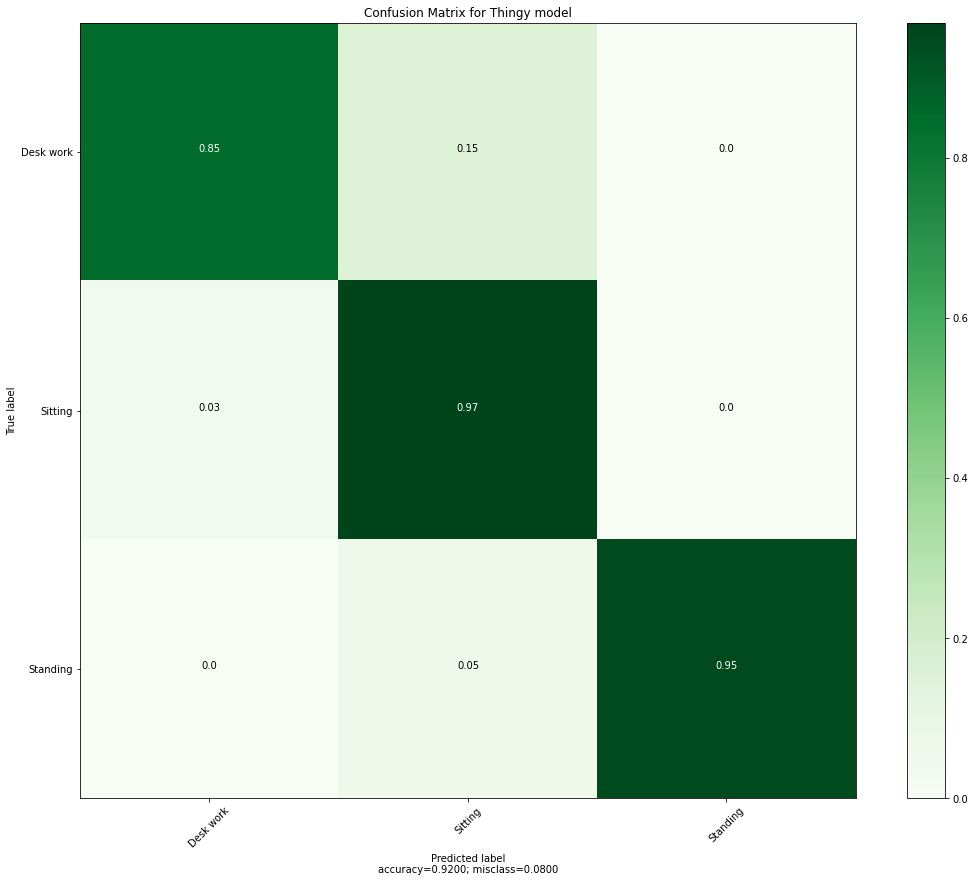

In [38]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import os
import itertools
import warnings
import argparse


R_class_labels = {
		0:"Sitting",
		1:"Sitting bent forward",
		2:"Sitting bent backward",
		3:"Standing",
		4:"Lying down left",
		5:"Lying down right",
		6:"Lying down on stomach",
		7:"Lying down on back",
		8:"Walking at normal speed",
		9:"Running",
		10:"Climbing stairs",
		11:"Descending stairs",
		12:"Desk work",
		13:"Movement"
		}
T_class_labels = {
		0:"Sitting",
		1:"Standing",
		2:"Desk work",
		}

##############################################
def plot_confusion_matrix(filename,cm,target_names,title='Confusion matrix',cmap=plt.cm.Greens,normalize=True):
	accuracy = round(np.trace(cm) / float(np.sum(cm)),2)
	misclass = 1 - accuracy

	if cmap is None:
		cmap = plt.get_cmap('Blues')

	plt.figure(figsize=(15, 12))
	plt.imshow(cm, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()

	if target_names is not None:
		tick_marks = np.arange(len(target_names))
		plt.xticks(tick_marks, target_names, rotation=45)
		plt.yticks(tick_marks, target_names)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


	thresh = cm.max() / 1.5 if normalize else cm.max() / 2
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		if normalize:
			plt.text(j, i, "{:0.4f}".format(round(cm[i, j],2)),
				horizontalalignment="center",
				color="white" if cm[i, j] > thresh else "black")
		else:
			plt.text(j, i, "{:,}".format(round(cm[i, j],2)),
				horizontalalignment="center",
				color="white" if cm[i, j] > thresh else "black")


	plt.tight_layout()
	plt.ylabel('True label')
	plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
	plt.savefig('./'+filename,dpi=300)
	print("Created ",filename," in the current directory")


#####################################################
	# thingy_df = pd.read_csv(thingy_data_path)
	# thingy_df=thingy_df[thingy_df["sensor_type"]=="Thingy"]
	# thingy_df = thingy_df[(thingy_df["activity_type"]=="Sitting")|(thingy_df["activity_type"]=="Standing")|(thingy_df["activity_type"]=="Desk work")]
	# T_X, T_y = into_windows(thingy_df, 50, 25) 
T_X = X_testA
T_y = []
indexes = np.argmax(y_testA, axis=1)


for i in indexes:
  print([i])
  T_y.append(T_class_labels[i])
  #print(i)

interpreter2 = tf.lite.Interpreter(model_path='Final_Model_T.tflite')

interpreter2.allocate_tensors()
input_details = interpreter2.get_input_details()
output_details = interpreter2.get_output_details()
T_y_pred = []
number_of_data = T_X.shape[0]
for i in range(0, number_of_data):
	input_data = np.array([T_X[i]]).astype(np.float32)
	interpreter2.set_tensor(input_details[0]['index'],input_data)#, np.expand_dims(input_data, axis=0))
	interpreter2.invoke()
	output_data = interpreter2.get_tensor(output_details[0]['index'])
	output_data = np.argmax(np.array(output_data[0]))
	T_y_pred.append(T_class_labels[output_data])
T_report = classification_report(T_y, T_y_pred)
print("*"*20,"classification_report for the Thingy model","*"*20)
print(T_report)
T_report = classification_report(T_y, T_y_pred,output_dict=True)
print("*"*20,"details: classification_report for the Thingy model","*"*20)
print(T_report)
############################################################
conf_mat = confusion_matrix(T_y, T_y_pred, normalize='true')
print_labels = ["Desk work","Sitting","Standing"]
plot_confusion_matrix("Confusion Matrix for Thingy model",conf_mat, normalize=False,target_names=print_labels,title='Confusion Matrix for Thingy model')

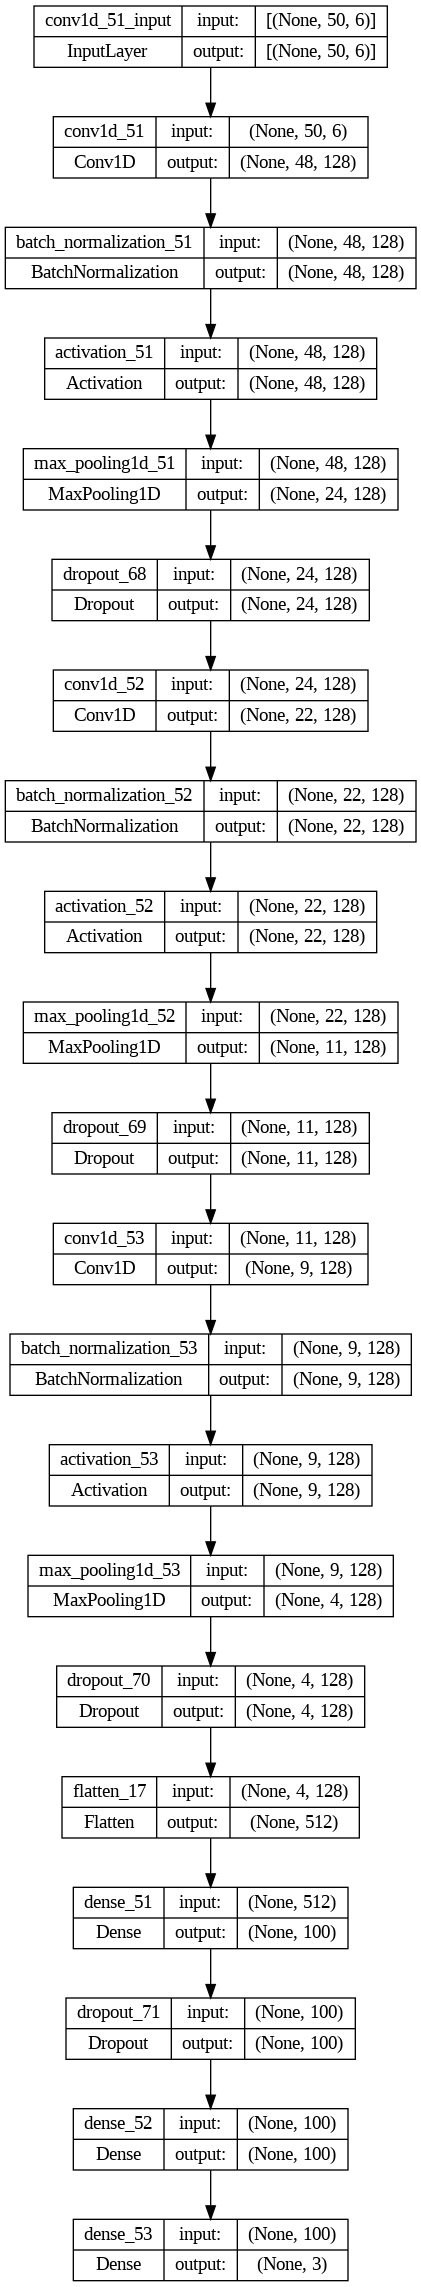

In [40]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='T_model_plot.png', show_shapes=True, show_layer_names=True)

In [36]:
from sklearn.model_selection import KFold

filters = 128
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 3


for kfold, (train, test) in enumerate(KFold(n_splits=5, shuffle=True).split(X, y)):
  print("******")
  print("Fold: ",kfold)

  print('Train Set')
  print(X[train].shape)
  print(y[train].shape)

  print('Test Set')
  print(X[test].shape)
  print(y[test].shape)

  y_train = np.asarray(pd.get_dummies(y[train]), dtype=np.float32)
  y_test = np.asarray(pd.get_dummies(y[test]), dtype=np.float32)

  X_train = X[train]
  X_test = X[test]

  model = Sequential()

  model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', 
                 input_shape=(window_size, n_features)))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'), )
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_classes, activation='softmax'))

  model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ['accuracy'])

  model.summary()

  model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test))#100
  

  
  print("******")

******
Fold:  0
Train Set
(3204, 50, 6)
(3204,)
Test Set
(801, 50, 6)
(801,)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 48, 128)           2432      
                                                                 
 batch_normalization_36 (Bat  (None, 48, 128)          512       
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 48, 128)           0         
                                                                 
 max_pooling1d_36 (MaxPoolin  (None, 24, 128)          0         
 g1D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 24, 128)           0         
                                          